<h1 style='color:midnightBlue' align='center'>Political Leader's Image Classification: Data Cleaning<h1>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/imran.jpg')
img.shape

(1200, 1200, 3)

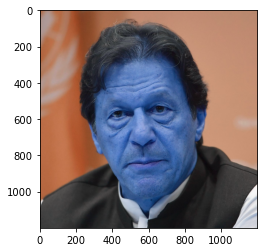

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1200)

In [5]:
gray

array([[104, 102, 101, ..., 133, 133, 132],
       [ 99,  98,  99, ..., 133, 133, 132],
       [ 97,  97,  98, ..., 133, 133, 132],
       ...,
       [ 50,  52,  54, ..., 199, 202, 205],
       [ 53,  54,  55, ..., 195, 201, 203],
       [ 56,  57,  57, ..., 193, 201, 201]], dtype=uint8)

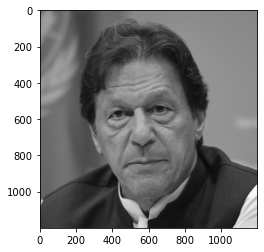

In [6]:
plt.imshow(gray, cmap='gray')

Model From Open CV haarcascades GitHub https://github.com/opencv/opencv/tree/master/data/haarcascades

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[228, 302, 652, 652]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(228, 302, 652, 652)

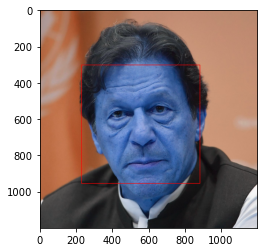

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

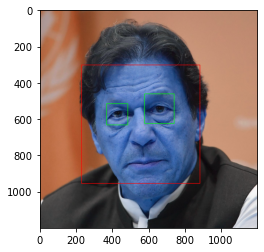

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

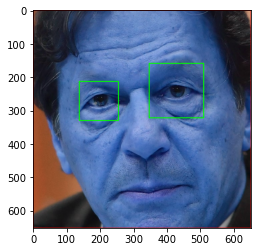

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

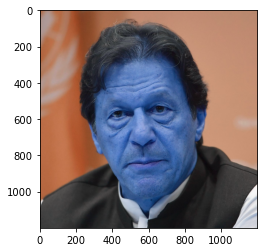

In [13]:
original_image = cv2.imread('./test_images/imran.jpg')
plt.imshow(original_image)

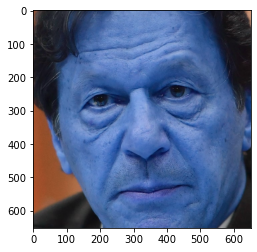

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/imran.jpg')
plt.imshow(cropped_image)

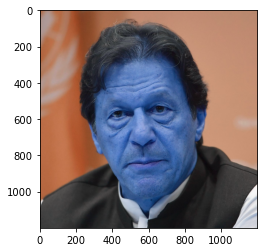

In [15]:
org_image_obstructed = cv2.imread('./test_images/imran.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/bieden.jpg')
cropped_image_no_2_eyes

array([[[ 30,  84, 131],
        [ 28,  83, 126],
        [ 46, 100, 141],
        ...,
        [ 78, 138, 184],
        [ 74, 140, 191],
        [ 69, 139, 193]],

       [[ 32,  87, 132],
        [ 36,  89, 132],
        [ 62, 113, 153],
        ...,
        [ 73, 132, 177],
        [ 74, 139, 190],
        [ 71, 138, 193]],

       [[ 38,  93, 136],
        [ 52, 106, 147],
        [ 70, 117, 155],
        ...,
        [ 74, 132, 174],
        [ 69, 132, 182],
        [ 66, 132, 185]],

       ...,

       [[ 24, 113, 174],
        [ 23, 112, 173],
        [ 24, 111, 173],
        ...,
        [ 36, 135, 197],
        [ 37, 132, 195],
        [ 37, 132, 195]],

       [[ 24, 113, 174],
        [ 24, 113, 174],
        [ 26, 113, 175],
        ...,
        [ 31, 130, 192],
        [ 38, 133, 196],
        [ 37, 132, 195]],

       [[ 24, 113, 174],
        [ 24, 113, 174],
        [ 26, 113, 175],
        ...,
        [ 31, 130, 192],
        [ 37, 132, 195],
        [ 36, 131, 194]]

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/cropped',
 './dataset/imran_khan',
 './dataset/joe_biden',
 './dataset/momota_banerjee',
 './dataset/sheikh_hasina',
 './dataset/vladimir_putin']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:                                   # roi = reason of interest
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
imran_khan
Generating cropped images in folder:  ./dataset/cropped/imran_khan
joe_biden
Generating cropped images in folder:  ./dataset/cropped/joe_biden
momota_banerjee
Generating cropped images in folder:  ./dataset/cropped/momota_banerjee
sheikh_hasina
Generating cropped images in folder:  ./dataset/cropped/sheikh_hasina
vladimir_putin
Generating cropped images in folder:  ./dataset/cropped/vladimir_putin


In [22]:
celebrity_file_names_dict

{'cropped': [],
 'imran_khan': ['./dataset/cropped/imran_khan/imran_khan1.png',
  './dataset/cropped/imran_khan/imran_khan2.png',
  './dataset/cropped/imran_khan/imran_khan3.png',
  './dataset/cropped/imran_khan/imran_khan4.png',
  './dataset/cropped/imran_khan/imran_khan5.png',
  './dataset/cropped/imran_khan/imran_khan6.png',
  './dataset/cropped/imran_khan/imran_khan7.png',
  './dataset/cropped/imran_khan/imran_khan8.png',
  './dataset/cropped/imran_khan/imran_khan9.png',
  './dataset/cropped/imran_khan/imran_khan10.png',
  './dataset/cropped/imran_khan/imran_khan11.png',
  './dataset/cropped/imran_khan/imran_khan12.png',
  './dataset/cropped/imran_khan/imran_khan13.png',
  './dataset/cropped/imran_khan/imran_khan14.png',
  './dataset/cropped/imran_khan/imran_khan15.png',
  './dataset/cropped/imran_khan/imran_khan16.png',
  './dataset/cropped/imran_khan/imran_khan17.png',
  './dataset/cropped/imran_khan/imran_khan18.png',
  './dataset/cropped/imran_khan/imran_khan19.png',
  './datas